In [155]:
# Import libraries
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [156]:
#Etiquetage de chaque colonne 
index = ['Fichier', 'Score', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18']

In [157]:
# Read in the dataset
vrp = pd.read_csv("XML100_2113_01.csv", sep=';', names = index)

### Compte tenu de l'analyse préliminaire des données, on enlève les colonnes suivantes

In [158]:
vrp = vrp.drop('Fichier', axis=1)

In [159]:
vrp = vrp.drop('S7', axis=1)

In [160]:
vrp = vrp.drop('S13', axis=1)

In [161]:
vrp = vrp.drop('S14', axis=1)

In [162]:
# List out our columns
vrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22823 entries, 0 to 22822
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Score   22823 non-null  int64  
 1   S1      22823 non-null  float64
 2   S2      22823 non-null  float64
 3   S3      22823 non-null  float64
 4   S4      22823 non-null  float64
 5   S5      22823 non-null  float64
 6   S6      22823 non-null  float64
 7   S8      22823 non-null  float64
 8   S9      22823 non-null  float64
 9   S10     22823 non-null  float64
 10  S11     22823 non-null  float64
 11  S12     22823 non-null  float64
 12  S15     22823 non-null  float64
 13  S16     22823 non-null  float64
 14  S17     22823 non-null  float64
 15  S18     22823 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 2.8 MB


In [163]:
# Take a closer look at column distributions
vrp.describe()

,Score,S1,S2,S3,S4,S5,S6,S8,S9,S10,S11,S12,S15,S16,S17,S18
count,22823.000000,22823.000000,22823.000000,22823.000000,22823.000000,22823.000000,22823.000000,22823.000000,22823.000000,22823.000000,22823.000000,22823.000000,22823.000000,22823.000000,22823.000000,22823.000000
mean,12526.042326,222.892609,98.774205,0.209191,0.150599,518.160912,163.799255,290.529935,0.246486,0.144389,432.212869,0.302183,373.965673,478.918350,2.562497,3.214911
std,180.237027,19.663969,21.747430,0.032220,0.071020,17.712589,29.989699,16.950550,0.014157,0.016494,28.328034,0.071448,70.713153,6.400133,0.569804,0.337359
min,12113.000000,171.267000,33.716100,0.126200,0.027800,468.800000,71.774900,234.200000,0.193300,0.105100,330.000000,0.201800,109.353000,441.939000,0.894400,2.335000
25%,12397.000000,209.196000,85.005900,0.187200,0.098000,502.200000,140.827000,278.800000,0.237800,0.130400,412.300000,0.214000,321.696000,474.250000,2.049400,2.955000
50%,12507.000000,221.786000,98.103300,0.208900,0.132400,517.500000,171.614000,290.400000,0.247700,0.143500,432.100000,0.363600,398.359000,478.732000,3.000000,3.196100
75%,12628.000000,234.367500,109.867500,0.229200,0.186600,531.100000,189.805000,302.300000,0.256300,0.156900,451.500000,0.363600,429.961500,483.565500,3.000000,3.447500
max,13628.000000,349.870000,251.313000,0.371600,0.486400,579.600000,212.693000,361.600000,0.292800,0.201500,544.800000,0.363600,537.946000,499.076000,3.000000,4.626500


#### On distingue les bonnes solutions des mauvaises selon qu'elles se trouvent ou non dans le premier quartile. Les bonnes solutions seront identifiées par "1" et les mauvaises par "0".

In [164]:
vrp.loc[vrp.Score <  12397, 'Score'] = 1
vrp.loc[vrp.Score >= 12397, 'Score'] = 0

In [165]:
vrp

,Score,S1,S2,S3,S4,S5,S6,S8,S9,S10,S11,S12,S15,S16,S17,S18
0,0,257.768,105.0410,0.2078,0.0803,534.2,133.2030,294.4,0.2274,0.1524,446.5,0.2066,327.901,482.077,1.6125,3.5971
1,0,201.777,57.7145,0.1561,0.0349,576.7,74.8466,302.6,0.2275,0.1691,420.3,0.2113,187.524,489.225,1.7889,4.1107
2,0,225.720,114.3020,0.1653,0.0572,552.8,112.2280,279.4,0.2105,0.1649,430.8,0.2062,307.325,484.538,1.5492,3.7572
3,0,243.308,164.7820,0.2140,0.1242,539.6,157.2250,297.6,0.2452,0.1512,432.2,0.3636,403.127,467.493,3.0000,3.5150
4,0,195.334,102.7790,0.1588,0.1049,563.7,79.7384,294.2,0.2256,0.1720,416.4,0.2074,213.558,490.165,1.6125,3.9475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22818,1,207.091,96.7488,0.1864,0.1588,496.5,192.5350,263.8,0.2388,0.1264,431.6,0.3636,437.910,483.043,3.0000,2.8950
22819,1,243.833,98.9140,0.2155,0.1477,491.0,205.1450,292.1,0.2583,0.1280,468.0,0.3636,452.332,479.700,3.0000,2.5150
22820,1,233.900,112.1430,0.2004,0.1324,501.8,191.9040,265.4,0.2397,0.1226,434.1,0.3636,437.359,475.748,3.0000,2.7350
22821,1,213.722,96.3236,0.1860,0.1152,496.5,192.5350,286.1,0.2536,0.1292,444.6,0.3636,440.911,482.336,3.0000,2.8500


<AxesSubplot:>

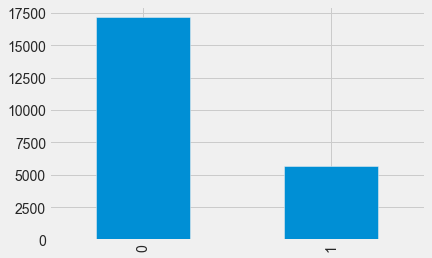

In [166]:
# Plot cancellation counts to visualize proportion of not cancelled and cancelled
vrp['Score'].value_counts().plot(kind='bar')

In [167]:
# Get an exact percentage of not cancelled and cancelled
vrp['Score'].value_counts()/vrp['Score'].count()*100

0    75.095299
1    24.904701
Name: Score, dtype: float64

In [168]:
# Compute correlation matrix 
vrp.corr()

,Score,S1,S2,S3,S4,S5,S6,S8,S9,S10,S11,S12,S15,S16,S17,S18
Score,1.000000,0.051106,0.034970,0.157981,0.190647,-0.493540,0.481260,-0.218069,0.202009,-0.364118,0.084218,0.356938,0.416239,-0.050566,0.353778,-0.489541
S1,0.051106,1.000000,0.685762,0.660304,0.259901,-0.585141,0.486117,-0.024744,0.172932,-0.262340,0.253948,0.295903,0.568003,-0.363024,0.315864,-0.343031
S2,0.034970,0.685762,1.000000,0.487498,0.413236,-0.468163,0.472446,-0.160805,0.186309,-0.316667,-0.040606,0.480324,0.595160,-0.587286,0.449682,-0.191867
S3,0.157981,0.660304,0.487498,1.000000,0.731403,-0.668614,0.615621,0.033407,0.380831,-0.216408,0.249891,0.367258,0.600045,-0.458967,0.427040,-0.381475
S4,0.190647,0.259901,0.413236,0.731403,1.000000,-0.602482,0.630172,-0.107073,0.385801,-0.434664,0.040675,0.571214,0.555657,-0.462827,0.539983,-0.336246
S5,-0.493540,-0.585141,-0.468163,-0.668614,-0.602482,1.000000,-0.930830,0.201886,-0.460965,0.613347,-0.269354,-0.692786,-0.884720,0.382038,-0.721809,0.757466
S6,0.481260,0.486117,0.472446,0.615621,0.630172,-0.930830,1.000000,-0.304366,0.497152,-0.650778,0.048303,0.843369,0.962676,-0.585591,0.853626,-0.690350
S8,-0.218069,-0.024744,-0.160805,0.033407,-0.107073,0.201886,-0.304366,1.000000,0.584435,0.178638,0.613236,-0.332508,-0.301402,0.229793,-0.302493,-0.065768
S9,0.202009,0.172932,0.186309,0.380831,0.385801,-0.460965,0.497152,0.584435,1.000000,-0.380141,0.384921,0.502519,0.479200,-0.385684,0.545167,-0.536329
S10,-0.364118,-0.262340,-0.316667,-0.216408,-0.434664,0.613347,-0.650778,0.178638,-0.380141,1.000000,-0.188715,-0.737841,-0.631252,0.349614,-0.622892,0.712362


In [169]:
# Which features are most correlated with cout_solution = 1 ?
vrp.corr()['Score'].sort_values(ascending=False)

Score    1.000000
S6       0.481260
S15      0.416239
S12      0.356938
S17      0.353778
S9       0.202009
S4       0.190647
S3       0.157981
S11      0.084218
S1       0.051106
S2       0.034970
S16     -0.050566
S8      -0.218069
S10     -0.364118
S18     -0.489541
S5      -0.493540
Name: Score, dtype: float64

In [170]:
# Define X and y
X, y = vrp.iloc[:,1:], vrp.iloc[:,0]

In [171]:
from sklearn.model_selection import train_test_split

# Train and test split using sklearn
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.20, random_state=123)

# Instantiate a XGBClassifier 
xgb_clf = xgb.XGBClassifier(random_state=123)

In [172]:
## Set max_depth to be 10 instead of 100
xgb_clf.set_params(n_estimators=10)

# Fit it to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

In [173]:
# Calculate the accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

# Print the baseline accuracy
print("Baseline accuracy:", accuracy)

Baseline accuracy: 0.9099671412924425


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

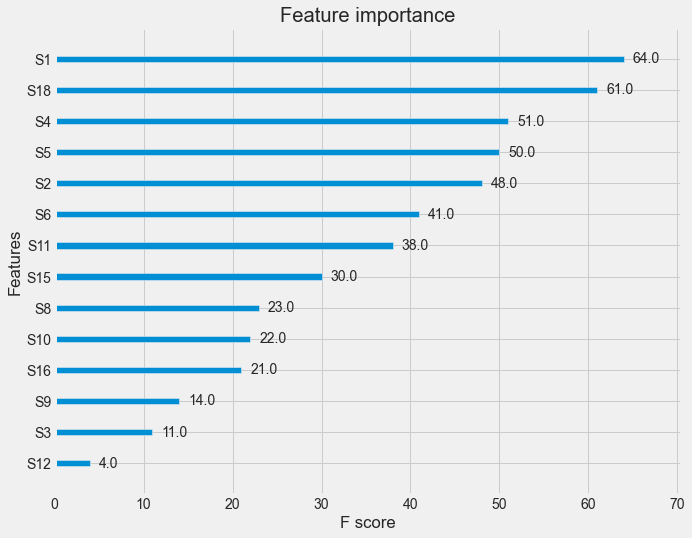

In [174]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8)

xgb.plot_importance(xgb_clf)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

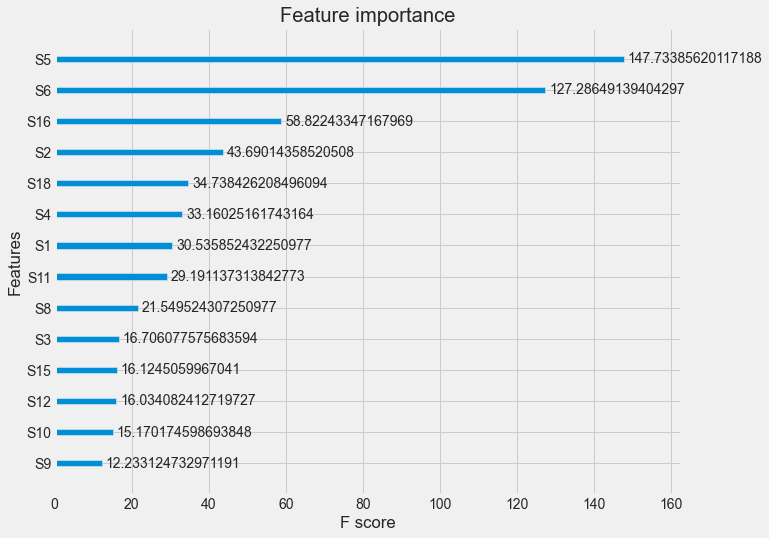

In [175]:
# Plot gain instead of weight. Gain is the average gain of splits which use the feature.
# Gain is way to quantify how much a feature contributes to improving accuracy
xgb.plot_importance(xgb_clf, importance_type="gain")

# Random forest

In [176]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
     
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [177]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision      1.0     1.0       1.0        1.0           1.0
recall         1.0     1.0       1.0        1.0           1.0
f1-score       1.0     1.0       1.0        1.0           1.0
support    13738.0  4520.0       1.0    18258.0       18258.0
_______________________________________________
Confusion Matrix: 
 [[13738     0]
 [    0  4520]]

Test Result:
Accuracy Score: 90.93%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.946220     0.807882   0.90931     0.877051      0.910946
recall        0.931197     0.845361   0.90931     0.888279      0.909310
f1-score      0.938648     0.826196   0.90931     0.882422      0.909975
support    3401.000000  1164.000000   0.90931  4565.000000   4565.000000
_________

### Autres modèles : Perceptron, KNN et SVM

In [183]:
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier

In [184]:
# Choix du modèle. On choisit le modèle et la suite reste inchangée.
# model = Perceptron()
# model = KNeighborsClassifier(n_neighbors=1)
# model = svm.SVC()
# model = LogisticRegression
model = Perceptron()

In [185]:
# Train and test split using sklearn
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.20, random_state=123)

In [186]:
# Train model on training set
model.fit(X_train, y_train)

Perceptron()

In [187]:
# Make predictions on the testing set
preds = model.predict(X_test)

In [188]:
# Calculate the accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

# Print the baseline accuracy
print("Baseline accuracy:", accuracy)

Baseline accuracy: 0.7686746987951807


### Résultat pour Perceptron 
Baseline accuracy: 0.7686746987951807
### Résultat pour 1NN
Baseline accuracy: 0.8902519167579409
### Résultat pour 5NN
Baseline accuracy: 0.8904709748083242
### Résultat pour SVM
Baseline accuracy: 0.8357064622124863

### Régression logistique

In [189]:
X_train.shape, X_test.shape

((18258, 15), (4565, 15))

In [191]:
# import libs
import scipy
#importing the tool
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#instanciation
stds = preprocessing.StandardScaler()
#transformation
Z_train = stds.fit_transform(X_train)
print(scipy.stats.describe(Z_train,axis=0,ddof=0))

DescribeResult(nobs=18258, minmax=(array([-2.62613402, -3.00148297, -2.58350699, -1.7354678 , -2.78649578,
       -3.079391  , -3.32388686, -3.76499419, -2.38077147, -3.59812124,
       -1.41176809, -3.75493811, -5.77423809, -2.75533487, -2.60115259]), array([6.43565143, 7.01998729, 5.04251589, 4.73585777, 3.47554881,
       1.62943971, 3.95744987, 3.26214011, 3.40011266, 3.95853615,
       0.85356562, 2.31726101, 3.15858963, 0.76239359, 4.1801653 ])), mean=array([ 9.34002939e-17, -5.79860158e-17, -9.83038093e-16, -3.81384533e-16,
       -1.13092189e-15,  5.88616435e-16, -9.84594765e-17,  1.00716650e-15,
        1.58021622e-15,  1.27413568e-15,  8.00712936e-17, -3.79487340e-16,
        5.56510084e-15,  1.94194778e-16,  6.11382757e-16]), variance=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), skewness=array([ 0.62101304,  0.75879188,  0.32645085,  1.12900397,  0.34280894,
       -0.65499081,  0.03692959, -0.407118  ,  0.29007628,  0.0891501 ,
       -0.3712436 , -0

In [192]:
# build the logit 
#instanciation
logit = LogisticRegression(penalty='none')


#Starting calculations and no need to add the constant
logit.fit(Z_train,y_train)

# computing OR
print(pd.DataFrame({"var":X_train.columns,"coef":logit.coef_[0], "OR":np.exp(logit.coef_[0])}))

    var      coef         OR
0    S1 -1.803763   0.164678
1    S2 -0.520114   0.594453
2    S3  1.018449   2.768898
3    S4 -1.774507   0.169567
4    S5 -3.920850   0.019824
5    S6 -0.092676   0.911489
6    S8 -3.521710   0.029549
7    S9  4.548679  94.507438
8   S10  0.506613   1.659661
9   S11 -3.672682   0.025408
10  S12 -0.614126   0.541114
11  S15 -1.112112   0.328864
12  S16  0.393974   1.482863
13  S17 -2.478595   0.083861
14  S18 -5.131965   0.005905


In [193]:
# transforming the test sample

Z_test = stds.transform(X_test)

y_pred_test = logit.predict(X_test)

C:\Users\Utilisateur\miniconda3\envs\LAB_3.10\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [194]:
# performance report 

import sklearn.metrics as metrics 

# applied prediction
predlog = logit.predict(Z_test)

# prediction quality 
print(metrics.classification_report(y_test,predlog))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3401
           1       0.84      0.82      0.83      1164

    accuracy                           0.92      4565
   macro avg       0.89      0.88      0.89      4565
weighted avg       0.91      0.92      0.91      4565



In [195]:
# only the accuracy 

from sklearn.metrics import accuracy_score

print('Model accuracy: {0:0.4f}'. format(accuracy_score(y_test,predlog)))

Model accuracy: 0.9152


In [196]:
# Check for overfitting and underfitting
# print the scores on training and test set

print('Training set accuracy: {:.4f}'.format(logit.score(Z_train, y_train)))

print('Testing set accuracy: {:.4f}'.format(logit.score(Z_test, y_test)))

Training set accuracy: 0.9093
Testing set accuracy: 0.9152
